# Health & Lifestyle Recommendation System

Build a smart system that recommends personalized fitness and nutrition adjustments based on user health data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from scipy.stats import spearmanr

print("Libraries loaded successfully")


Libraries loaded successfully


In [2]:
health_data = pd.read_csv('../data/Final_data.csv')
metadata = pd.read_csv('../data/meal_metadata.csv')

print("Data Overview:")
print(f"Total records: {health_data.shape[0]}")
print(f"Total features: {health_data.shape[1]}")
print("\nFirst few records:")
display(health_data.head())
print("\nMeal metadata:")
display(metadata.head())
print("\nAll columns available:")
print(health_data.columns.tolist())


Data Overview:
Total records: 20000
Total features: 54

First few records:


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low



Meal metadata:


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low



All columns available:
['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI', 'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins', 'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g', 'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method', 'prep_time_min', 'cook_time_min', 'rating', 'Name of Exercise', 'Sets', 'Reps', 'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group', 'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle', 'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg', 'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn', 'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin']


In [3]:
# Rule-based recommendation system
def health_recommendation_system(user):
    recommendations = []
    score = 0
    
    # BMI Analysis
    bmi = user['BMI']
    if bmi < 18.5:
        recommendations.append("Increase calorie intake with balanced protein meals (you're underweight).")
        score += 6
    elif bmi <= 24.9:
        recommendations.append("Your BMI is in a healthy range. Keep doing what you're doing.")
        score += 9
    elif bmi <= 29.9:
        recommendations.append("You're slightly overweight. Focus on moderate cardio and portion control.")
        score += 7
    else:
        recommendations.append("High BMI detected. Increase cardio sessions and reduce high-fat and sugary foods.")
        score += 5

    # Water Intake Analysis
    water = user['Water_Intake (liters)']
    if water < 1.5:
        recommendations.append("Drink more water. Aim for at least 2.5 liters per day.")
        score += 5
    elif water < 2.5:
        recommendations.append("Good hydration, but you can still drink a bit more. Target 2.5L daily.")
        score += 7
    else:
        recommendations.append("Great hydration habits! Keep it up.")
        score += 9

    # Workout Frequency Analysis
    workout_freq = user['Workout_Frequency (days/week)']
    if workout_freq < 2:
        recommendations.append("Start exercising at least 3 times a week for better health.")
        score += 5
    elif workout_freq < 4:
        recommendations.append("Good activity level. Try increasing intensity gradually.")
        score += 8
    else:
        recommendations.append("Excellent consistency with your workouts. Maintain this routine.")
        score += 10

    # Exercise Type Analysis
    exercise = str(user['Physical exercise']).lower()
    if "cardio" in exercise:
        recommendations.append("Cardio is great for heart health and stamina. Stick with it.")
        score += 9
    elif "strength" in exercise:
        recommendations.append("Strength training builds metabolism long term. Keep it going.")
        score += 9
    else:
        recommendations.append("Mix up your workouts. Add cardio, flexibility, and strength training.")
        score += 7

    # Meal Frequency Analysis
    meals = user['Daily meals frequency']
    if meals < 3:
        recommendations.append("Eat 3 to 5 balanced meals daily to stabilize your metabolism.")
        score += 6
    elif meals <= 5:
        recommendations.append("Perfect meal frequency. Keep meals balanced with proteins and vegetables.")
        score += 9
    else:
        recommendations.append("Too many meals might increase calorie intake. Try spacing them out more.")
        score += 6

    # Fat Percentage Analysis
    fat_pct = user['Fat_Percentage']
    if fat_pct < 10:
        recommendations.append("Low body fat. Make sure you're getting enough calories and nutrients.")
        score += 7
    elif fat_pct <= 20:
        recommendations.append("Your body fat percentage is healthy. Maintain your current routine.")
        score += 9
    elif fat_pct <= 30:
        recommendations.append("Moderate body fat. Add more cardio and strength training.")
        score += 7
    else:
        recommendations.append("High body fat. Focus on consistent cardio and clean eating.")
        score += 5

    # Calculate lifestyle score
    lifestyle_score = round(score / 6, 2)
    
    # Summary recommendation
    if lifestyle_score >= 8.5:
        recommendations.append("Overall: You're doing great! Keep maintaining this healthy lifestyle.")
    elif lifestyle_score >= 7:
        recommendations.append("Overall: Good progress. Focus on small improvements in one or two areas.")
    elif lifestyle_score >= 5:
        recommendations.append("Overall: You're on the right track. Make gradual changes across diet and exercise.")
    else:
        recommendations.append("Overall: Time to make some changes. Look at nutrition, hydration, and activity levels.")

    return recommendations, lifestyle_score


In [4]:
def visualize_health_profile(user, lifestyle_score):
    categories = ['BMI Health', 'Hydration', 'Workout Consistency', 'Meal Frequency']
    values = [
        np.clip((25 - abs(user['BMI'] - 22)) / 25 * 10, 0, 10),
        np.clip(user['Water_Intake (liters)'] / 2.5 * 10, 0, 10),
        np.clip(user['Workout_Frequency (days/week)'] / 5 * 10, 0, 10),
        np.clip(user['Daily meals frequency'] / 4 * 10, 0, 10)
    ]

    fig = go.Figure()
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=categories,
        fill='toself',
        name='Your Profile',
        line_color='#2E86AB'
    ))
    
    fig.add_trace(go.Scatterpolar(
        r=[10, 10, 10, 10],
        theta=categories,
        fill='toself',
        name='Ideal Target',
        line_color='#A23B72',
        opacity=0.5
    ))

    fig.update_layout(
        polar=dict(radialaxis=dict(visible=True, range=[0, 10])),
        title=f'Your Health Profile (Lifestyle Score: {lifestyle_score}/10)',
        showlegend=True,
        height=500,
        width=700
    )
    fig.show()


### Correlation Analysis

Explore relationships between health metrics to understand patterns in the data.

In [5]:
# Test the rule-based system
user = {
    'Age': 28,
    'Gender': 'Male',
    'BMI': 27.5,
    'Fat_Percentage': 22,
    'Workout_Frequency (days/week)': 2,
    'Physical exercise': 'Cardio & Stretching',
    'Water_Intake (liters)': 1.4,
    'Daily meals frequency': 2
}

recommendations, lifestyle_score = health_recommendation_system(user)

print("=" * 60)
print("PERSONALIZED HEALTH RECOMMENDATIONS")
print("=" * 60)
for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")
print("=" * 60)

visualize_health_profile(user, lifestyle_score)


PERSONALIZED HEALTH RECOMMENDATIONS
1. You're slightly overweight. Focus on moderate cardio and portion control.
2. Drink more water. Aim for at least 2.5 liters per day.
3. Good activity level. Try increasing intensity gradually.
4. Cardio is great for heart health and stamina. Stick with it.
5. Eat 3 to 5 balanced meals daily to stabilize your metabolism.
6. Moderate body fat. Add more cardio and strength training.
7. Overall: Good progress. Focus on small improvements in one or two areas.


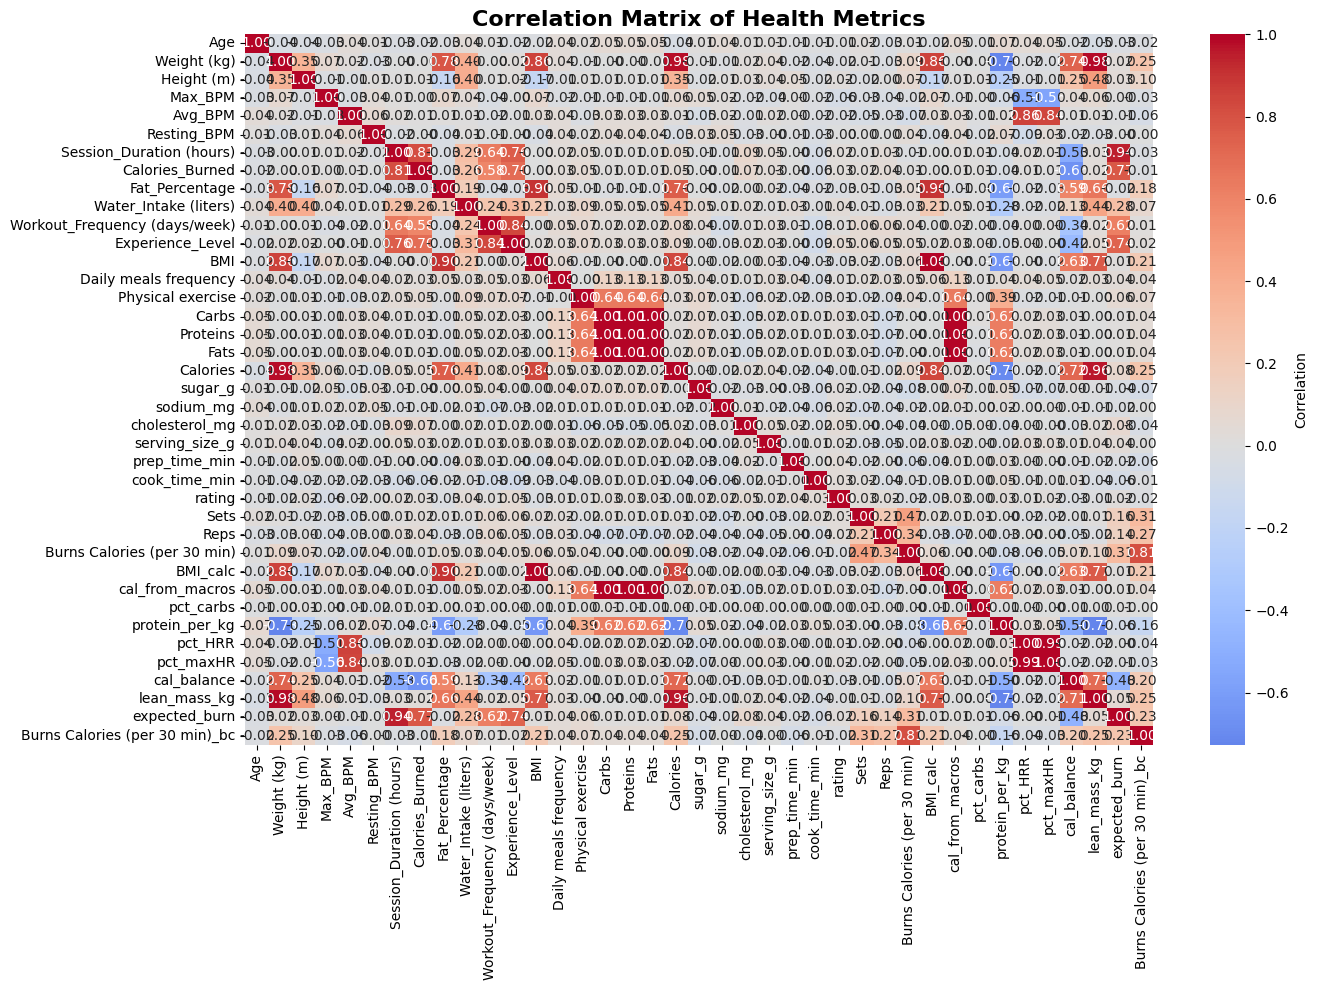


Top Correlations with BMI:
BMI                               1.000000
BMI_calc                          1.000000
Fat_Percentage                    0.902341
Weight (kg)                       0.855599
Calories                          0.837555
lean_mass_kg                      0.769327
cal_balance                       0.632670
Water_Intake (liters)             0.214091
Burns Calories (per 30 min)_bc    0.211487
Max_BPM                           0.073531
Name: BMI, dtype: float64

Top Correlations with Fat_Percentage:
Fat_Percentage                    1.000000
BMI_calc                          0.902341
BMI                               0.902341
Weight (kg)                       0.778875
Calories                          0.759601
lean_mass_kg                      0.659078
cal_balance                       0.594499
Water_Intake (liters)             0.185207
Burns Calories (per 30 min)_bc    0.178974
Max_BPM                           0.071926
Name: Fat_Percentage, dtype: float64

Top Corre

In [6]:
# Prepare data for correlation and ML analysis
numeric_cols = health_data.select_dtypes(include=[np.number]).columns
correlation_matrix = health_data[numeric_cols].corr()

# Visualize correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix of Health Metrics', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Find top correlations with key health metrics
print("\nTop Correlations with BMI:")
bmi_corr = correlation_matrix['BMI'].sort_values(ascending=False)
print(bmi_corr.head(10))

print("\nTop Correlations with Fat_Percentage:")
fat_corr = correlation_matrix['Fat_Percentage'].sort_values(ascending=False)
print(fat_corr.head(10))

print("\nTop Correlations with Calories_Burned:")
if 'Calories_Burned' in correlation_matrix.index:
    cal_corr = correlation_matrix['Calories_Burned'].sort_values(ascending=False)
    print(cal_corr.head(10))


### ML-Based Recommendation System

Use machine learning to predict ideal fitness recommendations based on user profile and historical data patterns.

In [7]:
# Prepare data for ML model
# Create target variable: healthy lifestyle indicator (1 if BMI healthy and good habits, 0 otherwise)
health_data['healthy_lifestyle'] = ((health_data['BMI'] <= 24.9) & 
                                      (health_data['Fat_Percentage'] <= 25) &
                                      (health_data['Water_Intake (liters)'] >= 2.0) &
                                      (health_data['Workout_Frequency (days/week)'] >= 3)).astype(int)

# Select features for ML model
ml_features = ['Age', 'BMI', 'Fat_Percentage', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
               'Session_Duration (hours)', 'Calories_Burned', 'Water_Intake (liters)',
               'Workout_Frequency (days/week)', 'Daily meals frequency']

# Drop rows with missing values in selected features
data_clean = health_data[ml_features + ['healthy_lifestyle']].dropna()

print(f"Data prepared: {data_clean.shape[0]} records with {len(ml_features)} features")
print(f"Healthy lifestyle distribution:\n{data_clean['healthy_lifestyle'].value_counts()}")

# Split data
X = data_clean[ml_features]
y = data_clean['healthy_lifestyle']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)

# Evaluate model
y_pred = rf_model.predict(X_test)
accuracy = rf_model.score(X_test, y_test)

print(f"\nModel Accuracy: {accuracy:.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Needs Improvement', 'Healthy']))


Data prepared: 20000 records with 11 features
Healthy lifestyle distribution:
healthy_lifestyle
0    15566
1     4434
Name: count, dtype: int64

Model Accuracy: 99.98%

Classification Report:
                   precision    recall  f1-score   support

Needs Improvement       1.00      1.00      1.00      3078
          Healthy       1.00      1.00      1.00       922

         accuracy                           1.00      4000
        macro avg       1.00      1.00      1.00      4000
     weighted avg       1.00      1.00      1.00      4000


Model Accuracy: 99.98%

Classification Report:
                   precision    recall  f1-score   support

Needs Improvement       1.00      1.00      1.00      3078
          Healthy       1.00      1.00      1.00       922

         accuracy                           1.00      4000
        macro avg       1.00      1.00      1.00      4000
     weighted avg       1.00      1.00      1.00      4000



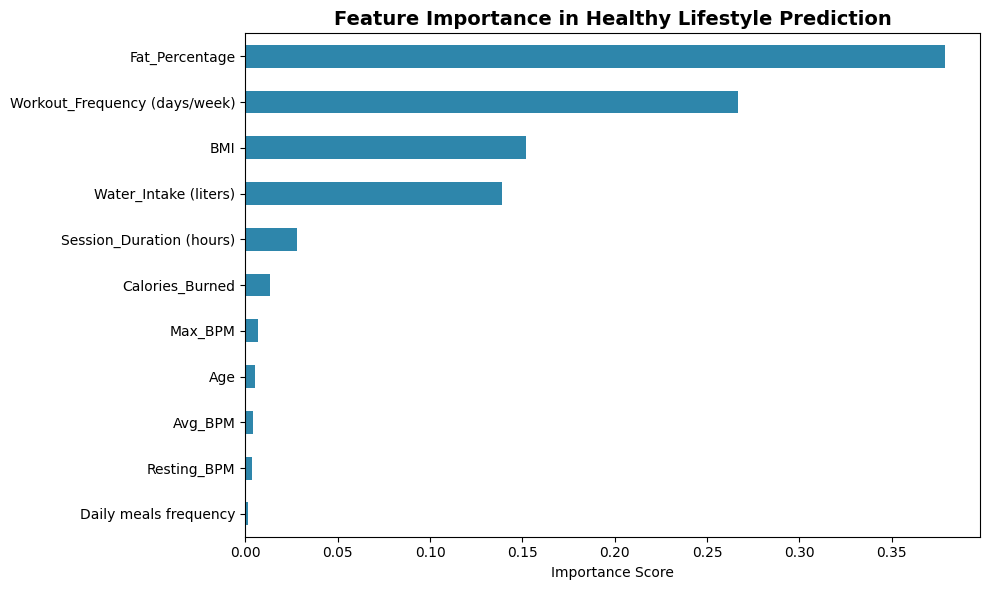


Top 5 Most Important Features:
Fat_Percentage                   0.378896
Workout_Frequency (days/week)    0.266944
BMI                              0.151876
Water_Intake (liters)            0.139177
Session_Duration (hours)         0.028117
dtype: float64


In [8]:
# Feature importance from ML model
feature_importance = pd.Series(rf_model.feature_importances_, index=ml_features).sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(10, 6))
feature_importance.plot(kind='barh', ax=ax, color='#2E86AB')
ax.set_title('Feature Importance in Healthy Lifestyle Prediction', fontsize=14, fontweight='bold')
ax.set_xlabel('Importance Score')
plt.tight_layout()
plt.show()

print("\nTop 5 Most Important Features:")
print(feature_importance.sort_values(ascending=False).head(5))


In [9]:
# Advanced ML recommendation function
def ml_based_recommendation(user_profile):
    # Create user dataframe
    user_df = pd.DataFrame([user_profile])
    
    # Ensure all required columns are present
    for col in ml_features:
        if col not in user_df.columns:
            user_df[col] = 0
    
    user_df = user_df[ml_features]
    
    # Get model prediction
    prediction = rf_model.predict(user_df)[0]
    probability = rf_model.predict_proba(user_df)[0]
    
    # Get feature importance scores
    feature_scores = dict(zip(ml_features, rf_model.feature_importances_))
    sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)
    
    # Generate recommendations based on features
    recommendations = []
    
    if prediction == 0:
        recommendations.append("ML Assessment: Your current habits need improvement for optimal health.")
    else:
        recommendations.append("ML Assessment: Great job! You're maintaining healthy habits.")
    
    # Provide specific recommendations based on worst-performing important features
    recommendations.append("\nAreas to focus on (by importance):")
    
    # Check critical features
    if user_profile['BMI'] > 24.9:
        recommendations.append(f"1. BMI Management: Your BMI is {user_profile['BMI']:.1f}. Aim for under 25.")
    
    if user_profile['Fat_Percentage'] > 25:
        recommendations.append(f"1. Body Composition: Fat percentage is {user_profile['Fat_Percentage']:.1f}%. Target under 25%.")
    
    if user_profile['Workout_Frequency (days/week)'] < 3:
        recommendations.append(f"2. Exercise Frequency: You're working out {user_profile['Workout_Frequency (days/week)']} days/week. Increase to 3-4.")
    
    if user_profile['Water_Intake (liters)'] < 2.0:
        recommendations.append(f"3. Hydration: Only drinking {user_profile['Water_Intake (liters)']} liters daily. Aim for 2.5+.")
    
    if user_profile['Daily meals frequency'] < 3:
        recommendations.append(f"4. Meal Frequency: {user_profile['Daily meals frequency']} meals per day is low. Try 3-5.")
    
    if user_profile['Resting_BPM'] > 80:
        recommendations.append(f"5. Heart Health: Resting heart rate is {user_profile['Resting_BPM']} bpm. Work on cardio fitness.")
    
    health_score = round(probability[1] * 100, 1)
    
    return recommendations, health_score, probability


# Test ML system
user_profile = {
    'Age': 28,
    'BMI': 27.5,
    'Fat_Percentage': 22,
    'Max_BPM': 180,
    'Avg_BPM': 130,
    'Resting_BPM': 75,
    'Session_Duration (hours)': 1.0,
    'Calories_Burned': 450,
    'Water_Intake (liters)': 1.4,
    'Workout_Frequency (days/week)': 2,
    'Daily meals frequency': 2
}

ml_recommendations, health_score, probabilities = ml_based_recommendation(user_profile)

print("=" * 60)
print("ML-BASED HEALTH ASSESSMENT")
print("=" * 60)
print(f"Health Score: {health_score}%")
print(f"Probability of Healthy Lifestyle: {probabilities[1]:.2%}")
print(f"Probability of Needs Improvement: {probabilities[0]:.2%}")
print("\nRecommendations:")
for rec in ml_recommendations:
    print(rec)
print("=" * 60)


ML-BASED HEALTH ASSESSMENT
Health Score: 1.0%
Probability of Healthy Lifestyle: 1.00%
Probability of Needs Improvement: 99.00%

Recommendations:
ML Assessment: Your current habits need improvement for optimal health.

Areas to focus on (by importance):
1. BMI Management: Your BMI is 27.5. Aim for under 25.
2. Exercise Frequency: You're working out 2 days/week. Increase to 3-4.
3. Hydration: Only drinking 1.4 liters daily. Aim for 2.5+.
4. Meal Frequency: 2 meals per day is low. Try 3-5.


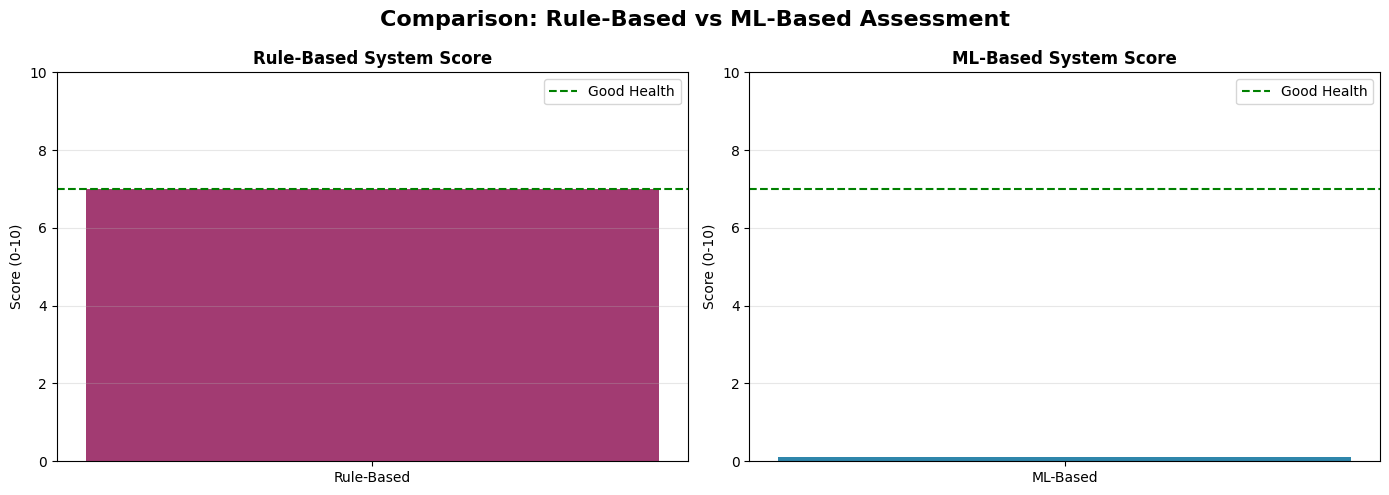

In [10]:
# Visualization: Comparison of Rule-Based vs ML-Based Systems
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Rule-based system results
rule_score = lifestyle_score
axes[0].bar(['Rule-Based'], [rule_score], color='#A23B72', width=0.5)
axes[0].set_ylim(0, 10)
axes[0].set_ylabel('Score (0-10)')
axes[0].set_title('Rule-Based System Score', fontweight='bold')
axes[0].axhline(y=7, color='green', linestyle='--', label='Good Health')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# ML-based system results
ml_score_normalized = health_score / 10
axes[1].bar(['ML-Based'], [ml_score_normalized], color='#2E86AB', width=0.5)
axes[1].set_ylim(0, 10)
axes[1].set_ylabel('Score (0-10)')
axes[1].set_title('ML-Based System Score', fontweight='bold')
axes[1].axhline(y=7, color='green', linestyle='--', label='Good Health')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.suptitle('Comparison: Rule-Based vs ML-Based Assessment', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Visualize relationships between key metrics
fig = px.scatter_matrix(
    data_clean[['BMI', 'Fat_Percentage', 'Workout_Frequency (days/week)', 'Water_Intake (liters)']],
    color=data_clean['healthy_lifestyle'],
    labels={'healthy_lifestyle': 'Healthy Lifestyle'},
    title='Relationships Between Key Health Metrics',
    height=700,
    width=900
)
fig.show()
